# Packages inladen

In [22]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd # Voor het verwerken van alle data
import numpy as np # Voor alle numerieke operaties
import sklearn # De library met Machine Learning technieken
import matplotlib.pyplot as plt # Visualisatie tool

# Data exploration

In [23]:
# Het inladen van tabellen. Dit wordt gezet in een "DataFrame"
df = pd.read_csv("../3dprinter/data.csv", sep = ';')
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strength,elongation
0,0.02,8,90,0,220,60,40,0,0,25,18,1.2
1,0.02,7,90,1,225,65,40,0,25,32,16,1.4
2,0.02,1,80,0,230,70,40,0,50,40,8,0.8
3,0.02,4,70,1,240,75,40,0,75,68,10,0.5
4,0.02,6,90,0,250,80,40,0,100,92,5,0.7


We gaan met regressie proberen om de `tension_strenght` te voorspellen aan de hand van de gegeven data.

In [62]:
# Onze voorspellers moet het materiaal gaan voorspellen. We willen niet dat we het materiaal als gegeven zien. Dan wordt het wel heel makkelijk!
X = df.drop("tension_strength", axis = 1)

# Onze afhankelijke waarde is de kolom "materiaal"
Y = df.tension_strength

X.head() # Hier zien we dat de infill pattern 1 en 0 zijn geworden. En de kolom material staat er niet meer in

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,elongation
0,0.02,8,90,0,220,60,40,0,0,25,1.2
1,0.02,7,90,1,225,65,40,0,25,32,1.4
2,0.02,1,80,0,230,70,40,0,50,40,0.8
3,0.02,4,70,1,240,75,40,0,75,68,0.5
4,0.02,6,90,0,250,80,40,0,100,92,0.7


In [63]:
X = X[['elongation', 'layer_height']]

In [64]:
# Y is nu een "Series" met de tension strength waarden
Y.head()

0    18
1    16
2     8
3    10
4     5
Name: tension_strength, dtype: int64

# Making a model

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5, random_state = 2)

## Linear regression

In [66]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)

In [67]:
# We gebruiken MSE en R2 als metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("MSE: {:.3f}".format(mean_squared_error(y_test, y_pred)))
print("R2:   {:.3f}".format(r2_score(y_test, y_pred)))
print()
# Print de coefficients van het model
for ii, col in enumerate(x_train.columns):
    print("{:20} {:.3f}".format(col, linreg.coef_[ii]))
print(f'Constante:            { linreg.intercept_:.3f}  ')

MSE: 22.707
R2:   0.629

elongation           10.860
layer_height         -12.835
Constante:            3.564  


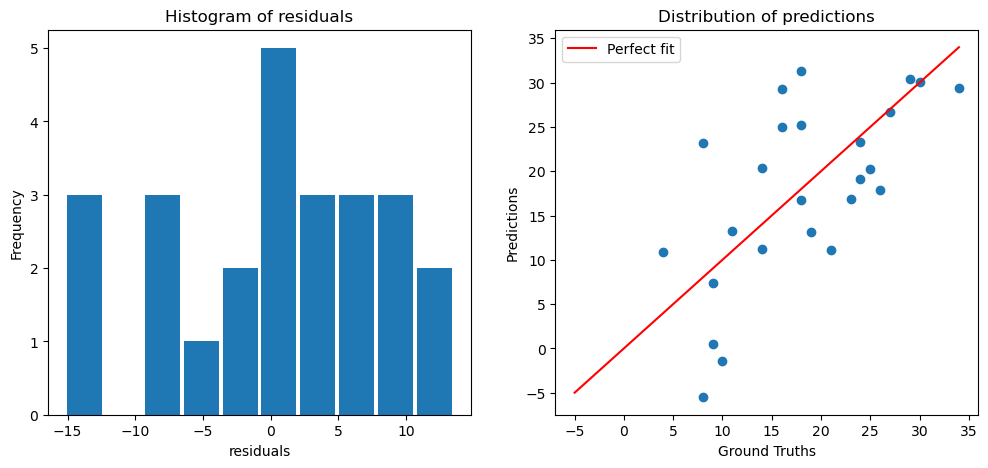

In [8]:
# Bereken de residuals en visualiseer de Ground Truths en de Predictions
res = y_test-y_pred
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
ax[0].hist(res, rwidth = 0.9)
ax[0].set_xlabel("residuals")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Histogram of residuals")

# Maak een scatter plot om de verdeling van de voorspellingen te visualiseren. Alle voorspellingen op de rode lijn zijn een perfect fit.
ax[1].scatter(y_test, y_pred)
ax[1].set_xlabel("Ground Truths")
ax[1].set_ylabel("Predictions")
ax[1].set_title("Distribution of predictions")
ax[1].plot([-5, y_test.max()], [-5, y_test.max()], c = "r", label = "Perfect fit")
plt.legend()
plt.show()

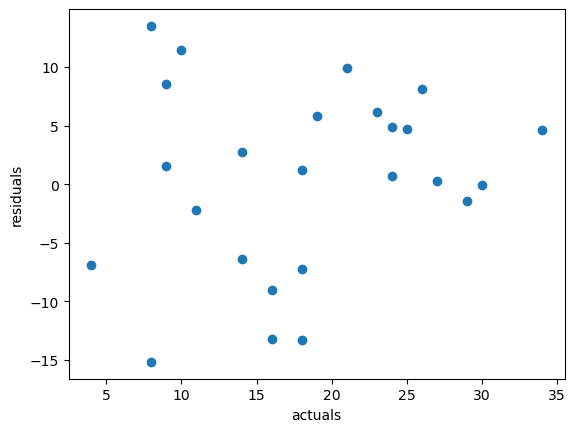

In [9]:
plt.scatter(y_test, res)
plt.xlabel('actuals')
plt.ylabel('residuals')
plt.show()

## Alternative linear models

In [10]:
from sklearn.linear_model import Ridge, Lasso
ridreg = Ridge()
ridreg.fit(x_train, y_train)
y_predridge = ridreg.predict(x_test)
print("MSE Ridge: {:.3f}".format(mean_squared_error(y_test, y_predridge)))
print("R2 Ridge:   {:.3f}".format(r2_score(y_test, y_predridge)))


lasreg = Lasso()
lasreg.fit(x_train, y_train)
y_predlasso = lasreg.predict(x_test)
print("MSE Lasso: {:.3f}".format(mean_squared_error(y_test, y_predlasso)))
print("R2 Lasso:   {:.3f}".format(r2_score(y_test, y_predlasso)))

from sklearn.svm import SVR
svmreg = SVR(C = 10, kernel = "linear")
svmreg.fit(x_train, y_train)
y_predsvm = svmreg.predict(x_test)
print("MSE SVM: {:.3f}".format(mean_squared_error(y_test, y_predsvm)))
print("R2 SVM:   {:.3f}".format(r2_score(y_test, y_predsvm)))

MSE Ridge: 15.808
R2 Ridge:   0.742
MSE Lasso: 17.320
R2 Lasso:   0.717
MSE SVM: 20.889
R2 SVM:   0.659


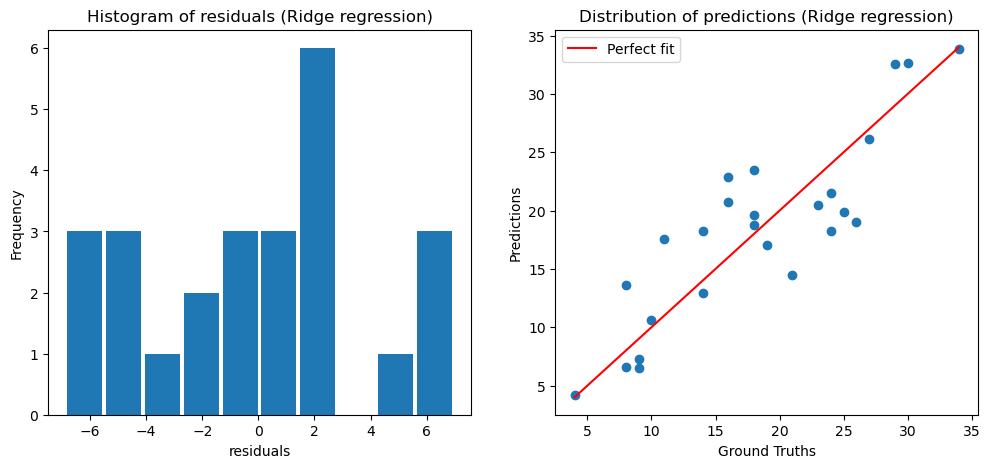

In [11]:
# Bereken de residuals en visualiseer de Ground Truths en de Predictions
res = y_test-y_predridge
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
ax[0].hist(res, rwidth = 0.9)
ax[0].set_xlabel("residuals")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Histogram of residuals (Ridge regression)")

# Maak een scatter plot om de verdeling van de voorspellingen te visualiseren. Alle voorspellingen op de rode lijn zijn een perfect fit.
ax[1].scatter(y_test, y_predridge)
ax[1].set_xlabel("Ground Truths")
ax[1].set_ylabel("Predictions")
ax[1].set_title("Distribution of predictions (Ridge regression)")
ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c = "r", label = "Perfect fit")
plt.legend()
plt.show()

## Non linear models


### SVM kernel

In [12]:
svm_rbf_reg = SVR(kernel = "rbf")
svm_rbf_reg.fit(x_train, y_train)
y_pred_svm_rbf = svm_rbf_reg.predict(x_test)
print("MSE SVM rbf: {:.3f}".format(mean_squared_error(y_test, y_pred_svm_rbf)))
print("R2 SVM rbf:   {:.3f}".format(r2_score(y_test, y_pred_svm_rbf)))

svm_poly_reg = SVR(kernel = "poly")
svm_poly_reg.fit(x_train, y_train)
y_pred_svm_poly = svm_poly_reg.predict(x_test)
print("MSE SVM poly: {:.3f}".format(mean_squared_error(y_test, y_pred_svm_poly)))
print("R2 SVM poly:   {:.3f}".format(r2_score(y_test, y_pred_svm_poly)))

MSE SVM rbf: 124.855
R2 SVM rbf:   -1.037
MSE SVM poly: 76.567
R2 SVM poly:   -0.249


### Decision Tree and Random Forest

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

DTreg = DecisionTreeRegressor()
DTreg.fit(x_train, y_train)
y_predDT = DTreg.predict(x_test)
print("MSE DT: {:.3f}".format(mean_squared_error(y_test, y_predDT)))
print("R2 DT:   {:.3f}".format(r2_score(y_test, y_predDT)))


RFreg = RandomForestRegressor()
RFreg.fit(x_train, y_train)
y_predRF = RFreg.predict(x_test)
print("MSE RF: {:.3f}".format(mean_squared_error(y_test, y_predRF)))
print("R2 RF:   {:.3f}".format(r2_score(y_test, y_predRF)))

MSE DT: 30.480
R2 DT:   0.503
MSE RF: 24.868
R2 RF:   0.594


### Multi Layer Perceptron/Neural Networks Regression

In [14]:
from sklearn.neural_network import MLPRegressor

NNreg = MLPRegressor(hidden_layer_sizes=(8),  activation = "identity", max_iter = 100000, alpha = 0.01)
NNreg.fit(x_train, y_train)
y_predNNlinear = NNreg.predict(x_test)
print("MSE NN linear: {:.3f}".format(mean_squared_error(y_test, y_predNNlinear)))
print("R2 NN linear:   {:.3f}".format(r2_score(y_test, y_predNNlinear)))

NNreg = MLPRegressor(hidden_layer_sizes=(8),  activation = "logistic", max_iter = 100000, alpha = 0.01)
NNreg.fit(x_train, y_train)
y_predNN = NNreg.predict(x_test)
print("MSE NN logistic: {:.3f}".format(mean_squared_error(y_test, y_predNN)))
print("R2 NN logistic:   {:.3f}".format(r2_score(y_test, y_predNN)))

NNreg = MLPRegressor(hidden_layer_sizes=(8),  activation = "relu", max_iter = 100000, alpha = 0.01)
NNreg.fit(x_train, y_train)
y_predNN = NNreg.predict(x_test)
print("MSE NN relu: {:.3f}".format(mean_squared_error(y_test, y_predNN)))
print("R2 NN relu:   {:.3f}".format(r2_score(y_test, y_predNN)))

MSE NN linear: 17.988
R2 NN linear:   0.706
MSE NN logistic: 91.488
R2 NN logistic:   -0.493
MSE NN relu: 14.201
R2 NN relu:   0.768


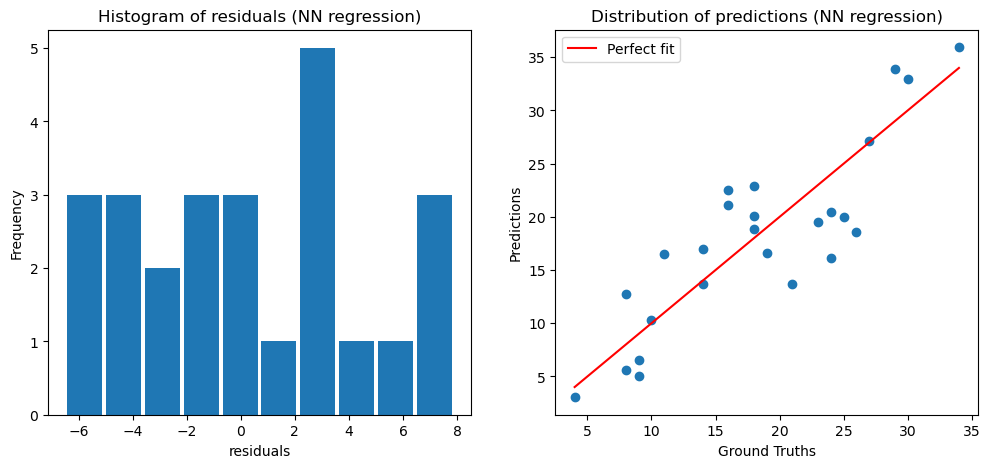

In [15]:
# Bereken de residuals en visualiseer de Ground Truths en de Predictions
res = y_test-y_predNNlinear
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
ax[0].hist(res, rwidth = 0.9)
ax[0].set_xlabel("residuals")
ax[0].set_ylabel("Frequency")
ax[0].set_title("Histogram of residuals (NN regression)")

# Maak een scatter plot om de verdeling van de voorspellingen te visualiseren. Alle voorspellingen op de rode lijn zijn een perfect fit.
ax[1].scatter(y_test, y_predNNlinear)
ax[1].set_xlabel("Ground Truths")
ax[1].set_ylabel("Predictions")
ax[1].set_title("Distribution of predictions (NN regression)")
ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c = "r", label = "Perfect fit")
plt.legend()
plt.show()

## plotting coefficients

Text(0.5, 0, 'Coefficients')

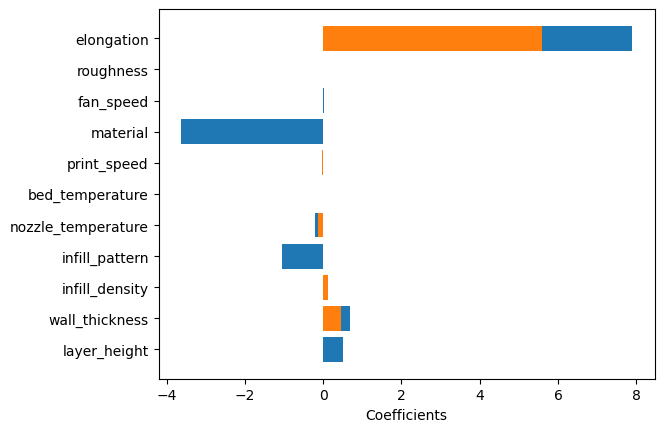

In [16]:
plt.barh(y = x_train.columns, width = ridreg.coef_)
plt.barh(y = x_train.columns, width = lasreg.coef_)
plt.xlabel('Coefficients')

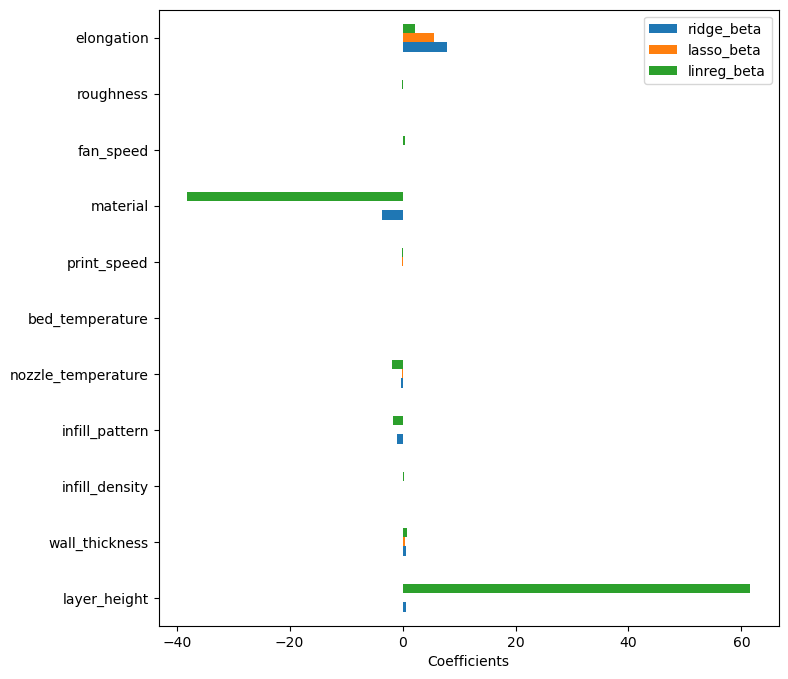

In [17]:
plot_df = pd.DataFrame(data = {'ridge_beta': ridreg.coef_, 
                               'lasso_beta': lasreg.coef_, 
                               'linreg_beta': linreg.coef_}, index = x_train.columns)
plot_df.plot.barh(figsize = (8, 8))
plt.xlabel('Coefficients')
plt.show()